# Wine dataset
# Goal: Predicting the alcohol content in wine based on chemical characteristics

In [ ]:
pip install pandas matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_wine() # 3 classi

In [ ]:
data_pd = load_wine(as_frame=True)

df = pandas.DataFrame(data.data, columns=data.feature_names)

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [ ]:
X = df.drop(columns=["alcohol"])
y = df["alcohol"] # Target

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, train_size=0.8, shuffle=True)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_test = scaler.transform(X_test) # Perform standardization by centering and scaling.

In [ ]:
# Create the model
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1)  # Output: 1 class
])

In [ ]:
# Compile the model
model.compile(optimizer="adam",
              loss="mse",
              metrics=["mae"])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 160.2568 - mae: 12.6159 - val_loss: 144.0377 - val_mae: 11.9708
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 146.5662 - mae: 12.0688 - val_loss: 130.1426 - val_mae: 11.3721
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 130.9157 - mae: 11.3933 - val_loss: 116.4874 - val_mae: 10.7480
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 117.9039 - mae: 10.8066 - val_loss: 102.1828 - val_mae: 10.0466
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 103.2572 - mae: 10.0832 - val_loss: 86.9509 - val_mae: 9.2296
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 84.9821 - mae: 9.1018 - val_loss: 70.7079 - val_mae: 8.2613
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 66.2068 - mae: 7.9622 - val_loss: 53.9549 - val_mae: 7.0840
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 48.6750 - mae: 6.6110 - val_loss: 38.8341 - val_mae: 5.8404
Epoch 9/100
15/15 ━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 2.2923 - mae: 1.2426
Mean Absolute Error: 1.22
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


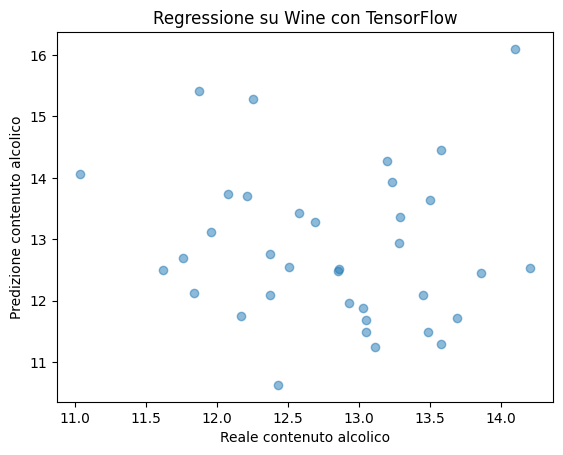

In [ ]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {test_mae:.2f}")

# Make the prediction
y_pred = model.predict(X_test)

# Visualise the result
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Reale contenuto alcolico")
plt.ylabel("Predizione contenuto alcolico")
plt.title("Regressione su Wine con TensorFlow")
plt.show()